ejercicio 1:

In [1]:
!pip install tensorflow opencv-python

In [2]:
import tensorflow as tf
import numpy as np
import cv2
from google.colab import files

In [13]:
# Subir el modelo .tflite y las imágenes
uploaded = files.upload()

Saving model_unquant.tflite to model_unquant.tflite


descomprimir:

In [ ]:
!unzip /content/IMG.zip -d /content/img

In [10]:
!unzip /content/modelo.zip -d /content/modelo

Archive:  /content/modelo.zip
 extracting: /content/modelo/model_unquant.tflite  
 extracting: /content/modelo/labels.txt  


In [14]:
# Cargar el modelo tflite
interpreter = tf.lite.Interpreter(model_path="model_1.tflite")
interpreter.allocate_tensors()

In [15]:
# Función para preprocesar la imagen antes de la predicción
def preprocess_image(image_path):
    # Leer la imagen
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Redimensionar a tamaño requerido
    image = np.expand_dims(image, axis=0)  # Añadir dimensión extra para lote
    image = np.float32(image)  # Convertir a tipo flotante
    image = image / 255.0  # Normalizar
    return image

In [16]:
# Función para realizar la predicción
def predict(image_path):
    # Preprocesar la imagen
    image = preprocess_image(image_path)

    # Configurar los tensores de entrada y salida
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()

    # Obtener resultados
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prediction = np.argmax(output_data, axis=1)  # Obtener la clase con mayor probabilidad
    return prediction

In [17]:
from google.colab import files

# Subir la imagen desde tu dispositivo (escritorio)
uploaded = files.upload()

# Verifica los archivos cargados
print(uploaded)

# Obtener el nombre del archivo cargado
image_path = next(iter(uploaded))  # Obtiene el nombre del archivo cargado
print(f"Imagen cargada: {image_path}")

Saving cuchara-tenedor (4).jpeg to cuchara-tenedor (4).jpeg
{'cuchara-tenedor (4).jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x04\x06\x02\xe0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x01\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x17\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xfd\x1a\xcb\x04\x16X*\n\x00\x12\x91D\xb2\x80\x00\x00\x00\x00\x00\x02\x14\x00\x08PJ\x00\x00\x04\xa0\x94\x01(@\n%\x82P\x00\x11F4\x00\x01\x14@\x00@\x006 PE%B\x90\xa0\x00\x00\x00\x00\x01\n\x0

Predicción: El objeto es un(a) Cuchara-Tenedor.


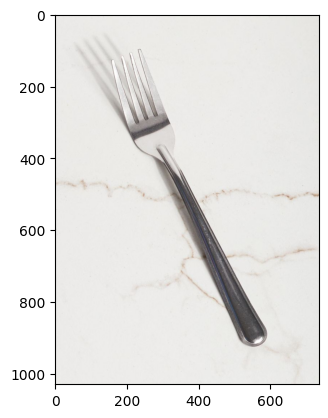

In [18]:
# Realizar la predicción
prediction = predict(image_path)

# Diccionario de clases
clases = [
    "Cuchillo",
    "Olla-Sartén-Tetera",
    "Cuchara-Tenedor",
    "Cucharón",
    "Plato",
    "Taza",
    "Colador",
    "Tabla",
    "Pelador",
    "Espátula",
    "Rayador"
]

# Mostrar la predicción en la consola
print(f"Predicción: El objeto es un(a) {clases[prediction[0]]}.")

import matplotlib.pyplot as plt

# Mostrar la imagen cargada
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para Matplotlib
plt.imshow(img)
plt.show()